### Benchmark the speed

Run the script below to get the estimate of fps you can achieve on your machine.
For this experiment we used ```timeit``` magic function.

C:\Users\abinenfe\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\functional.py:1820: UserWarning: nn.functional.upsample_bilinear is deprecated. Use nn.functional.upsample instead.
  warnings.warn("nn.functional.upsample_bilinear is deprecated. Use nn.functional.upsample instead.")


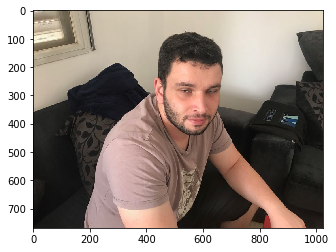

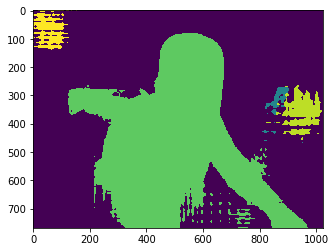

In [10]:
%matplotlib inline

import sys, os
sys.path.append('C:/Users/abinenfe/Documents/Studies/Computer Vision HW - Git/vision/hw2/q3/')
sys.path.append('C:/Users/abinenfe/Documents/Studies/Computer Vision HW - Git/vision/hw2/q3/pytorch_segmentation_detection/')
sys.path.insert(0, 'C:/Users/abinenfe/Documents/Studies/Computer Vision HW - Git/vision/hw2/q3/vision/')

# Use second GPU -pytorch-segmentation-detection- change if you want to use a first one
os.environ["CUDA_VISIBLE_DEVICES"] = '0' # TODO - Changed 3 -> 0

from PIL import Image
from matplotlib import pyplot as plt

import torch
from torchvision import transforms
from torch.autograd import Variable
import pytorch_segmentation_detection.models.resnet_dilated as resnet_dilated

import numpy as np


img_path = 'demo_img_igor.jpeg'

valid_transform = transforms.Compose(
                [
                     transforms.ToTensor(),
                     transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
                ])

img_not_preprocessed = Image.open(img_path).convert('RGB')

img = valid_transform(img_not_preprocessed)

img = img.unsqueeze(0)

# img = Variable(img.cuda()) 
img = Variable(img) 


fcn = resnet_dilated.Resnet34_8s(num_classes=21)
fcn.load_state_dict(torch.load('resnet_34_8s_68.pth', map_location=lambda storage, loc: storage))
#fcn.cuda()
fcn.eval()

res = fcn(img)

_, tmp = res.squeeze(0).max(0)

segmentation = tmp.data.cpu().numpy().squeeze()

plt.imshow(img_not_preprocessed)
plt.show()

plt.imshow(segmentation)
plt.show()

In [ ]:
def benchmark_fcn():
    
    img = valid_transform(img_not_preprocessed)

    img = img.unsqueeze(0)

    img = Variable(img.cuda())
    
    res = fcn(img)

In [ ]:
img_not_preprocessed.size

In [ ]:
%%timeit 
# 50ms on a 512 by 512 image

benchmark_fcn()